In [1]:
from sklearn import cluster, datasets
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
import collections
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

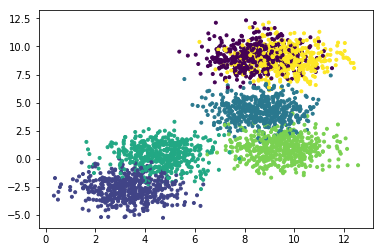

In [2]:
n_samples = 3000
n_datasets = 100
centers=np.random.randint(7,size=n_datasets)+3
random_state=np.random.randint(500,size=n_datasets)
blobs=[]
for i in range(n_datasets):
    #print i,centers[i],random_state[i]
    blobs.append(datasets.make_blobs(n_samples = n_samples, 
                                     centers=centers[i], random_state=random_state[i]))

x,y = blobs[1]
plt.scatter(x[:,0],x[:,1],marker='.',c=y)

In [4]:
k=[]
k_aic=[]
k_bic=[]
k_vbem=[]
for i in range(n_datasets):
    if i%10 ==0:
        print i
    #print "n_centers",centers[1]
    x,y = blobs[i]
    k.append(y.max()+1)
    aics =[ GaussianMixture(n_components=i+1).fit(x).aic(x) for i in range(9)]
    k_aic.append(np.argmin(aics))
    #print "aic:",np.argmin(aics)
    bics =[ GaussianMixture(n_components=i+1).fit(x).bic(x) for i in range(9)]
    k_bic.append(np.argmin(bics))
    #print "bic:",np.argmin(bics)
    t = BayesianGaussianMixture(n_components=10).fit(x).predict(x)
    k_vbem.append(len(collections.Counter(t)))

0
10
20
30
40
50
60
70
80
90


In [5]:
score_aic = np.sum((np.array(k)-np.array(k_aic))**2)
print score_aic
score_bic = np.sum((np.array(k)-np.array(k_bic))**2)
print score_bic
score_vbem = np.sum((np.array(k)-np.array(k_vbem))**2)
print score_vbem

215
331
193


In [6]:
c_aic=np.array(k)-np.array(k_aic)
print "aic",c_aic
c_bic=np.array(k)-np.array(k_bic)
print "bic",c_bic
c_vbem=np.array(k)-np.array(k_vbem)
print "vbem",c_vbem

aic [1 1 1 1 3 1 1 2 2 1 1 1 1 0 1 1 2 2 2 3 1 1 1 2 3 1 1 1 1 0 1 1 1 1 1 1 2
 2 2 1 2 1 1 1 1 3 2 1 1 1 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 3 1 2 1
 2 0 3 2 1 1 2 1 1 2 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1]
bic [1 2 1 2 3 1 1 3 1 1 2 1 1 2 2 2 2 3 2 4 1 1 1 2 2 1 1 1 1 1 2 1 0 1 1 1 3
 2 3 1 2 1 1 1 2 4 2 1 2 3 3 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 2 2 3 1 3 2 2 4
 2 1 3 2 1 1 3 1 1 2 1 2 2 1 2 2 1 1 1 2 1 1 1 2 1 2]
vbem [ 0  0  0 -1  1  0  0  2  0 -2  1 -3 -1  0  1  0  1  1  2  3  0  0  0 -1  2
  0 -1  0 -4  0  1  0 -3  0  0  0  2  1  2 -3  1 -1 -6 -2  1  3  0  0  1  2
  2  0 -1  0  0  0  0  0  0  0 -1  0  0 -1 -1  2 -1  1  1 -1  2  0  1  3  1
  0  2  1  0  0  1  0  0 -3  0  0  0 -1  0  1  0  0  0  0  0  0  0 -1  0  0]


In [7]:
print collections.Counter(c_aic)
print collections.Counter(c_bic)
print collections.Counter(c_vbem)

Counter({1: 68, 2: 21, 3: 7, 0: 4})
Counter({1: 52, 2: 33, 3: 11, 4: 3, 0: 1})
Counter({0: 49, 1: 17, -1: 13, 2: 10, -3: 4, 3: 3, -2: 2, -6: 1, -4: 1})
